## 1. 定义路段相似度

构建一个特征向量，使用例如欧几里得距离来计算两个路段之间的相似度。

## 2. 选取并实现合适的聚类算法

考虑到路段数据可能会有不同的大小和形状，K-均值可能不是最佳选择。相反，基于密度的聚类算法，如DBSCAN（Density-Based Spatial Clustering of Applications with Noise），可能更适合，因为它可以识别任意形状的聚类，并且对异常值具有一定的鲁棒性。

## 3. 评估聚类效果

聚类效果可以通过轮廓系数（Silhouette Coefficient）等指标来评估。轮廓系数结合了聚类的密集度和分离度，其值范围在-1到1之间，值越高表示聚类效果越好。

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 载入数据
df = pd.read_csv('./data/road.csv',header=0,encoding='utf-8')


In [3]:
df.head()

,id,coordinates,highway,length,lanes,tunnel,bridge,maxspeed,width,alley,roundabout
0,0,"[[116.3894407, 39.9062721], [116.3894463, 39.9...",4,28.981,0,0,0,0,0,0,0
1,1,"[[116.3894407, 39.9062721], [116.386428, 39.90...",4,325.040,5,0,0,0,0,0,0
2,2,"[[116.3930703, 39.906394], [116.3894407, 39.90...",4,309.891,5,0,0,0,0,0,0
3,3,"[[116.3970962, 39.9065222], [116.3930703, 39.9...",4,343.693,5,0,0,0,0,0,0
4,4,"[[116.3970962, 39.9065222], [116.3970144, 39.9...",11,34.704,0,0,0,0,0,0,0


In [4]:
# 选择用于聚类的特征
features = ['lanes', 'maxspeed', 'bridge', 'tunnel', 'alley', 'roundabout', 'width']
X = df[features]

# 数据标准化
X_scaled = StandardScaler().fit_transform(X)

In [5]:
# 应用DBSCAN聚类算法
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 将聚类结果添加到数据框
df['cluster'] = clusters

# 评估聚类效果
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'轮廓系数: {silhouette_avg}')

# 显示聚类结果
print(df[['lanes', 'maxspeed', 'bridge', 'tunnel', 'alley', 'roundabout', 'width', 'cluster']])


轮廓系数: 0.9976665396662223
       lanes  maxspeed  bridge  tunnel  alley  roundabout  width  cluster
0          0         0       0       0      0           0      0        0
1          5         0       0       0      0           0      0        1
2          5         0       0       0      0           0      0        1
3          5         0       0       0      0           0      0        1
4          0         0       0       0      0           0      0        0
...      ...       ...     ...     ...    ...         ...    ...      ...
38022      0         0       0       0      0           0      0        0
38023      0         0       0       0      0           0      0        0
38024      0         0       0       0      0           0      0        0
38025      0         0       0       0      0           0      0        0
38026      0         0       0       0      0           0      0        0

[38027 rows x 8 columns]


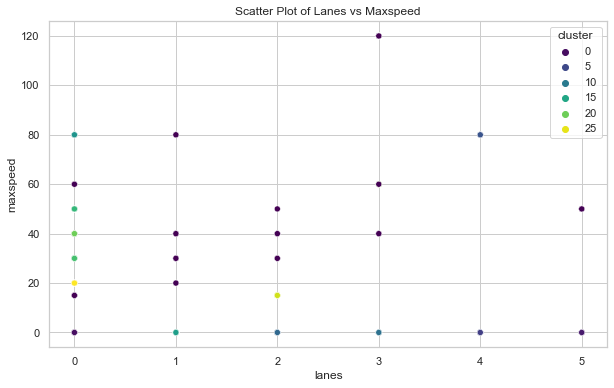

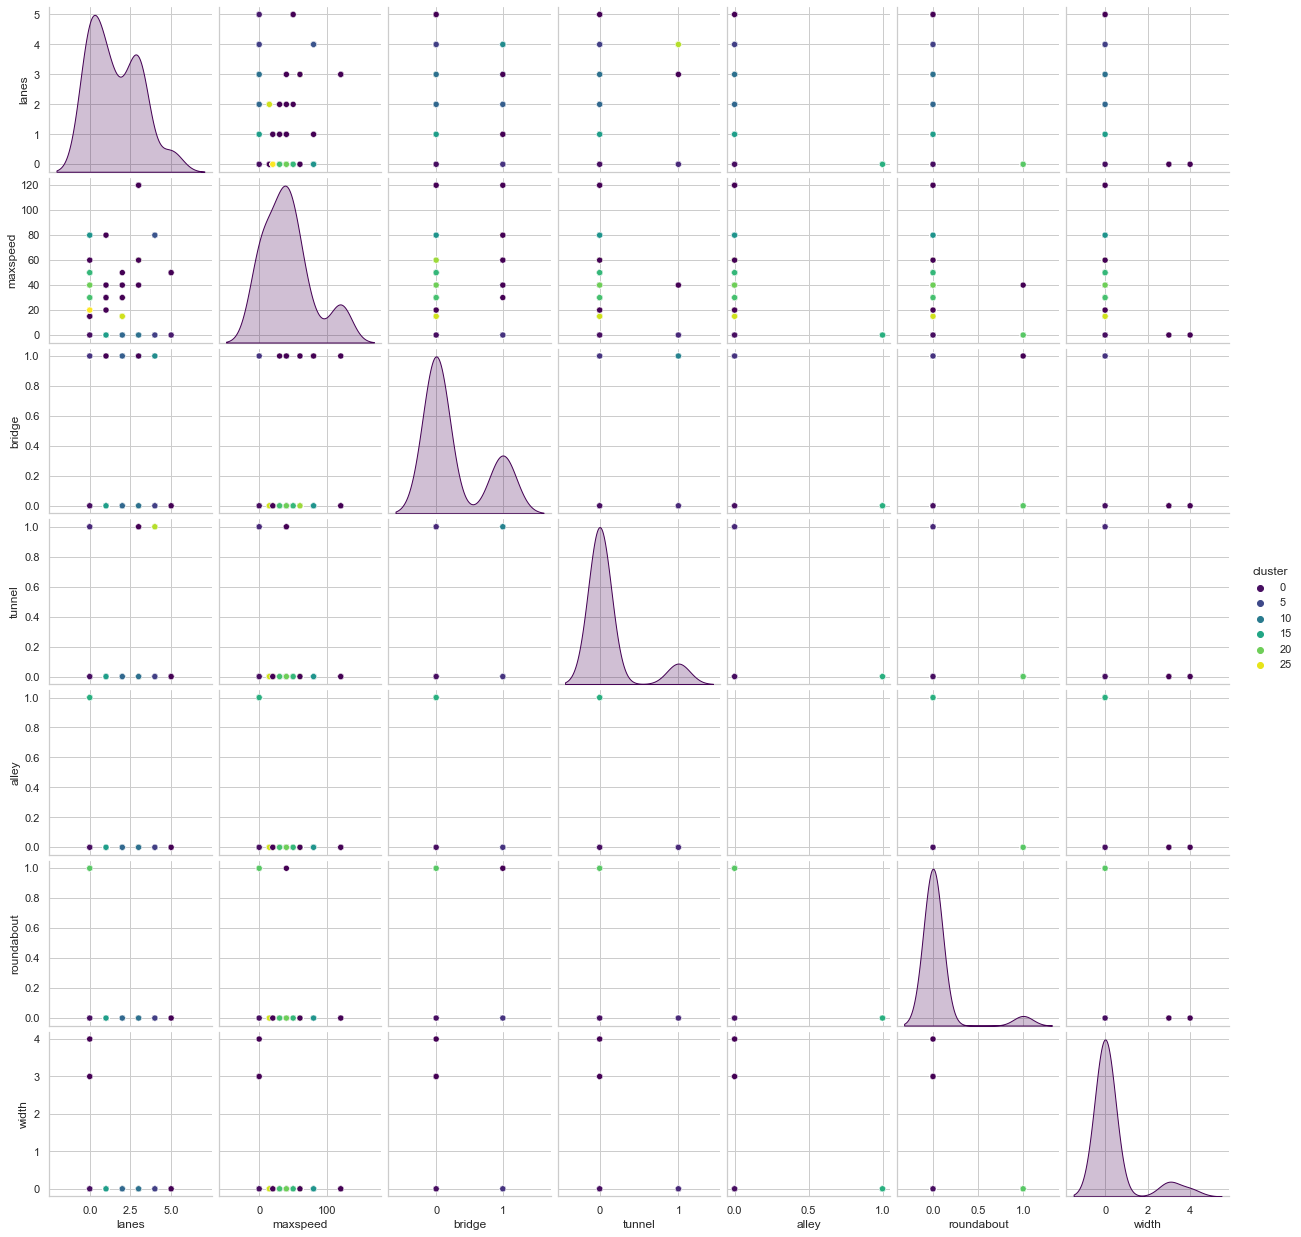

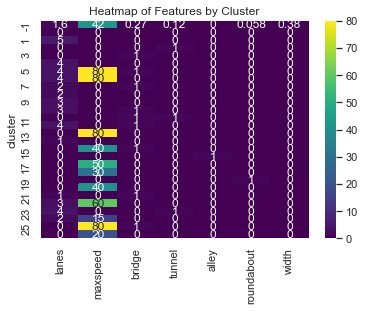

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 设置绘图风格
sns.set(style="whitegrid")

# 散点图 - 以车道数和最高限速为例
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lanes', y='maxspeed', hue='cluster', data=df, palette='viridis')
plt.title('Scatter Plot of Lanes vs Maxspeed')
plt.show()

# 成对图 - 显示所有特征对
sns.pairplot(df[features + ['cluster']], hue='cluster', palette='viridis')
plt.show()

# 热力图 - 显示不同聚类的平均特征值
clustered_features = df.groupby('cluster')[features].mean()
sns.heatmap(clustered_features, cmap='viridis', annot=True)
plt.title('Heatmap of Features by Cluster')
plt.show()